This code is to look at employment data in the area where SRCDC operates (the Grangetown, Canton, and Riverside areas of Cardiff). The data is from the last UK cencus in 2011.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

The data is arranged by output area, OA. These are small areas on about 150 people each. These are combined to make lower super output areas, LSOAs, of about 1500 people. The LSOA codes for the areas we are interested in are in the lists below (taken from https://gov.wales/docs/statistics/lsoamaps/lsoa.htm). Note, south Grangetown and North Riverside are much more affluent than the the South Riverside, North Grangetown, and Canton areas where the SRCDC operates, so we exclude those OAs from the analysis.

In [2]:
grangetown_codes = ['W01001759','W01001760','W01001761','W01001762','W01001764','W01001765',\
                    'W01001766','W01001767','W01001768','W01001946']
canton_codes = ['W01001709', 'W01001710', 'W01001711', 'W01001712', 'W01001713', 'W01001714',\
                'W01001715', 'W01001716', 'W01001717'] 
riverside_codes = ['W01001855', 'W01001856', 'W01001857', 'W01001862']
lsoa_codes = np.concatenate([grangetown_codes, canton_codes, riverside_codes])


south_grangetown=['W01001945','W01001947']
north_riverside = ['W01001858', 'W01001859', 'W01001860','W01001861']

To get the OA codes for each OA the LSOAs, I scrape the webpage for each LSOA. The webpage for each LSOA is of the form http://statistics.data.gov.uk/doc/statistical-geography/[[LSOA_CODE]]. The OA codes are saved as a list for easy looping through them and a dictionary so that we can work backwards and get the LSOA from the code.  

In [3]:
oa_codes_dict = {}
oa_codes_list = []
for index in lsoa_codes:
    oa_page = requests.get("http://statistics.data.gov.uk/doc/statistical-geography/" + index)
    soup = BeautifulSoup(oa_page.content, 'html.parser')
    link_form = "a[href*=http://statistics.data.gov.uk/id/statistical-geography/W00]"
    oa_codes_dict[index] = [soup.select(link_form)[i].getText() for i in range(len(soup.select(link_form)))]
    oa_codes_list=np.concatenate([oa_codes_list,[soup.select(link_form)[i].getText() for i in range(len(soup.select(link_form)))]])
    

In [4]:
full_data = pd.read_csv('census_employment_data.csv')

The column names are too long and repetitive. Here we trim them down to the core information.

In [5]:
new_keys = []
for key in full_data.keys():
    if 'Economic Activity' in key:
        new_keys.append(''.join(key.split(':')[1:-1]).split(';')[0].strip())
    else:
        new_keys.append(key.strip())
full_data.columns = new_keys

In [6]:
data = full_data.set_index('geography')

In [7]:
local_data = data.loc[oa_codes_list]

In [8]:
local_data.keys()

Index(['date', 'geography code', 'All usual residents aged 16 to 74',
       'Economically active', 'Economically active In employment',
       'Economically active Employee Part-time',
       'Economically active Employee Full-time',
       'Economically active Self-employed', 'Economically active Unemployed',
       'Economically active Full-time student', 'Economically Inactive',
       'Economically inactive Retired',
       'Economically inactive Student (including full-time students)',
       'Economically inactive Looking after home or family',
       'Economically inactive Long-term sick or disabled',
       'Economically inactive Other', 'Unemployed Age 16 to 24',
       'Unemployed Age 50 to 74', 'Unemployed Never worked',
       'Long-term unemployed'],
      dtype='object')

In [9]:
local_data.describe()

,date,All usual residents aged 16 to 74,Economically active,Economically active In employment,Economically active Employee Part-time,Economically active Employee Full-time,Economically active Self-employed,Economically active Unemployed,Economically active Full-time student,Economically Inactive,Economically inactive Retired,Economically inactive Student (including full-time students),Economically inactive Looking after home or family,Economically inactive Long-term sick or disabled,Economically inactive Other,Unemployed Age 16 to 24,Unemployed Age 50 to 74,Unemployed Never worked,Long-term unemployed
count,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,2011.0,241.706897,165.974138,142.939655,32.724138,90.086207,20.129310,13.112069,9.922414,75.732759,21.034483,15.500000,14.000000,16.586207,8.612069,3.706897,2.129310,2.784483,4.818966
std,0.0,50.972971,37.322673,35.314805,9.865695,26.853732,8.375461,6.925406,13.333287,30.058597,8.593153,17.412889,8.781403,9.050649,6.282857,2.800675,1.853458,2.525715,3.226518
min,2011.0,128.000000,77.000000,61.000000,11.000000,30.000000,3.000000,0.000000,0.000000,28.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.0,214.750000,146.000000,123.750000,26.000000,74.750000,14.000000,7.000000,4.000000,56.000000,14.750000,9.000000,7.000000,10.000000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,2011.0,236.500000,168.000000,143.500000,31.000000,89.000000,18.000000,12.000000,8.000000,69.500000,20.000000,12.000000,12.000000,15.000000,8.000000,3.000000,2.000000,2.000000,4.000000
75%,2011.0,268.000000,188.000000,165.250000,40.000000,106.250000,26.000000,19.000000,12.000000,92.250000,26.000000,18.000000,19.000000,22.000000,11.000000,5.000000,3.000000,4.250000,6.250000
max,2011.0,457.000000,264.000000,237.000000,61.000000,170.000000,41.000000,30.000000,139.000000,229.000000,50.000000,177.000000,44.000000,48.000000,33.000000,13.000000,8.000000,10.000000,16.000000


In [10]:
data.describe()

,date,All usual residents aged 16 to 74,Economically active,Economically active In employment,Economically active Employee Part-time,Economically active Employee Full-time,Economically active Self-employed,Economically active Unemployed,Economically active Full-time student,Economically Inactive,Economically inactive Retired,Economically inactive Student (including full-time students),Economically inactive Looking after home or family,Economically inactive Long-term sick or disabled,Economically inactive Other,Unemployed Age 16 to 24,Unemployed Age 50 to 74,Unemployed Never worked,Long-term unemployed
count,10036.0,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.00000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000
mean,2011.0,223.711240,147.143782,130.171283,31.189916,79.648067,19.33330,9.634217,7.338282,76.567457,36.020426,13.339976,8.608609,14.025508,4.572937,3.066162,1.675967,1.489737,3.829016
std,0.0,64.685946,43.652680,41.038376,9.931464,29.722592,14.28359,6.300261,15.313598,38.711130,15.486139,33.957502,5.484050,9.821047,10.951347,2.752434,1.485698,1.865106,3.231950
min,2011.0,56.000000,8.000000,5.000000,1.000000,4.000000,0.00000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.0,193.000000,120.000000,104.000000,25.000000,60.000000,10.00000,5.000000,3.000000,61.000000,25.000000,6.000000,5.000000,7.000000,2.000000,1.000000,1.000000,0.000000,2.000000
50%,2011.0,218.000000,144.000000,127.000000,31.000000,76.000000,16.00000,8.000000,5.000000,73.000000,35.000000,9.000000,8.000000,12.000000,4.000000,2.000000,1.000000,1.000000,3.000000
75%,2011.0,245.000000,170.000000,152.000000,37.000000,94.000000,24.00000,13.000000,8.000000,87.000000,45.000000,13.000000,11.000000,19.000000,6.000000,4.000000,2.000000,2.000000,5.000000
max,2011.0,2094.000000,769.000000,740.000000,127.000000,712.000000,135.00000,71.000000,546.000000,1454.000000,134.000000,1432.000000,46.000000,93.000000,950.000000,36.000000,15.000000,22.000000,30.000000


We now look at a few of these employment statistics to see if our local OAs show any interesting trends. I generate a box plot for each of the chosen statistics, and also a bar chart for the top 1 pecentile of OAs in Wales (top percentile is top 100 OAs as there are 10036 OAs in Wales). I print out the OA code for an local OAs in the top 1 pecentile so we can see if there are any that crop up a lot. 

In [11]:
unemployed_rate_lnl = pd.concat([local_data['Economically active Unemployed']/local_data['Economically active'],\
                            data['Economically active Unemployed']/data['Economically active']],\
                           axis=1,keys=['local','non-local'])


In [12]:
unemployed_rate_lnl.plot(kind='box',title='Rate of Unemployment')

In [ ]:
order = unemployed_rate_lnl['non-local'].dropna().sort_values().keys()
unemployed_rate_lnl['non-local'][oa_codes_list]=np.nan
unemployed_rate_lnl.set_index(unemployed_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Unemployment Rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]

In [14]:
care_rate_lnl = pd.concat([local_data['Economically inactive Looking after home or family']/local_data['All usual residents aged 16 to 74'],\
                            data['Economically inactive Looking after home or family']/data['All usual residents aged 16 to 74']],\
                           axis=1,keys=['local','non-local'])


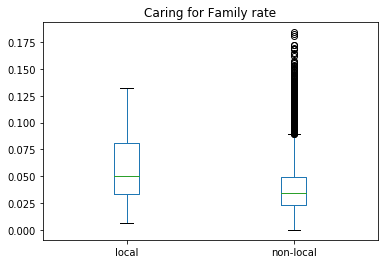

In [15]:
care_rate_lnl.plot(kind='box',title='Caring for Family rate')

['W00009105', 'W00009570', 'W00009574', 'W00009101']

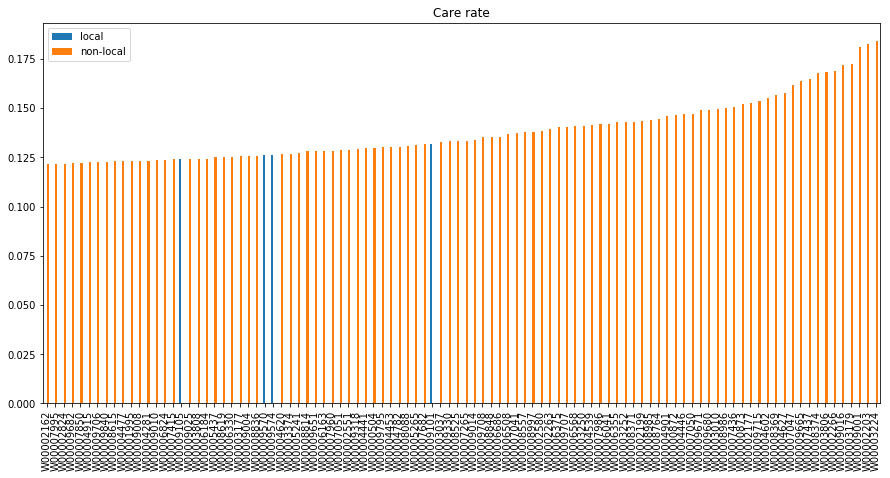

In [16]:
order = care_rate_lnl['non-local'].dropna().sort_values().keys()
care_rate_lnl['non-local'][oa_codes_list]=np.nan
care_rate_lnl.set_index(care_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Care rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]

In [17]:
other_inactive_rate_lnl = pd.concat([local_data['Economically inactive Other']/local_data['All usual residents aged 16 to 74'],\
                            data['Economically inactive Other']/data['All usual residents aged 16 to 74']],\
                           axis=1,keys=['local','non-local'])

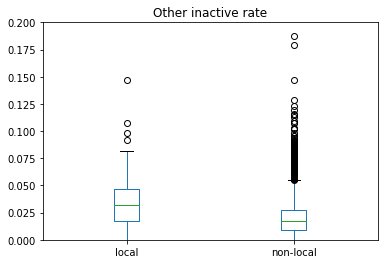

In [18]:
other_inactive_rate_lnl.plot(kind='box',title='Other inactive rate',ylim=(0,0.2))

['W00009108', 'W00009091', 'W00009570', 'W00009135', 'W00009575', 'W00009107']

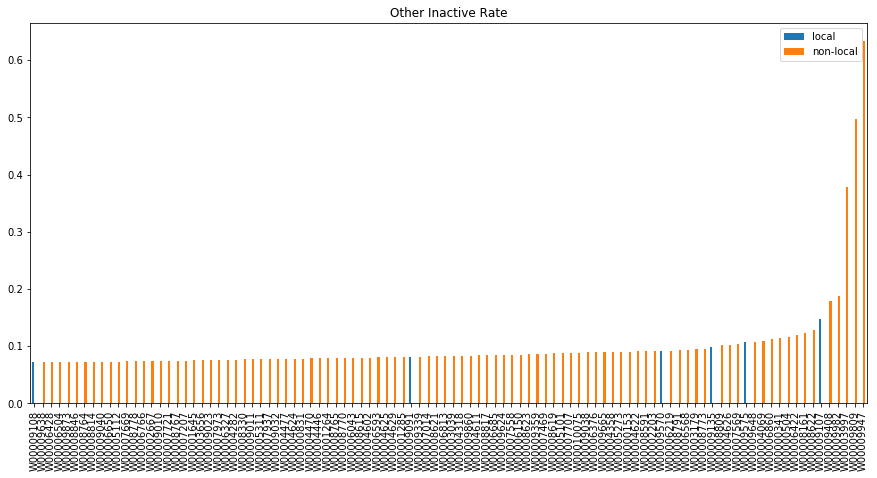

In [19]:
order = other_inactive_rate_lnl['non-local'].dropna().sort_values().keys()
other_inactive_rate_lnl['non-local'][oa_codes_list]=np.nan
other_inactive_rate_lnl.set_index(other_inactive_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Other Inactive Rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]

In [20]:
long_term_unemplyed_rate_lnl = pd.concat([local_data['Long-term unemployed']/local_data['All usual residents aged 16 to 74'],\
                            data['Long-term unemployed']/data['All usual residents aged 16 to 74']],\
                           axis=1,keys=['local','non-local'])

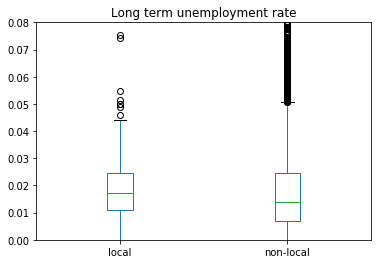

In [21]:
long_term_unemplyed_rate_lnl.plot(kind='box',title='Long term unemployment rate',ylim=(0,0.08))

['W00009118', 'W00009575']

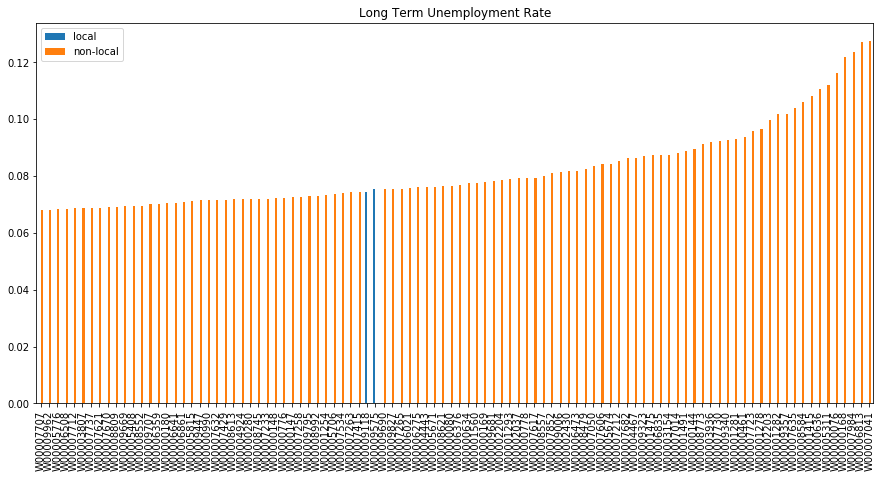

In [22]:
order = long_term_unemplyed_rate_lnl['non-local'].dropna().sort_values().keys()
long_term_unemplyed_rate_lnl['non-local'][oa_codes_list]=np.nan
long_term_unemplyed_rate_lnl.set_index(long_term_unemplyed_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Long Term Unemployment Rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]

In [23]:
never_worked_rate_lnl = pd.concat([local_data['Unemployed Never worked']/local_data['All usual residents aged 16 to 74'],\
                            data['Unemployed Never worked']/data['All usual residents aged 16 to 74']],\
                           axis=1,keys=['local','non-local'])

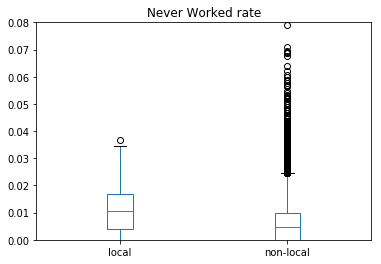

In [24]:
never_worked_rate_lnl.plot(kind='box',title='Never Worked rate',ylim=(0,0.08))

['W00009091']

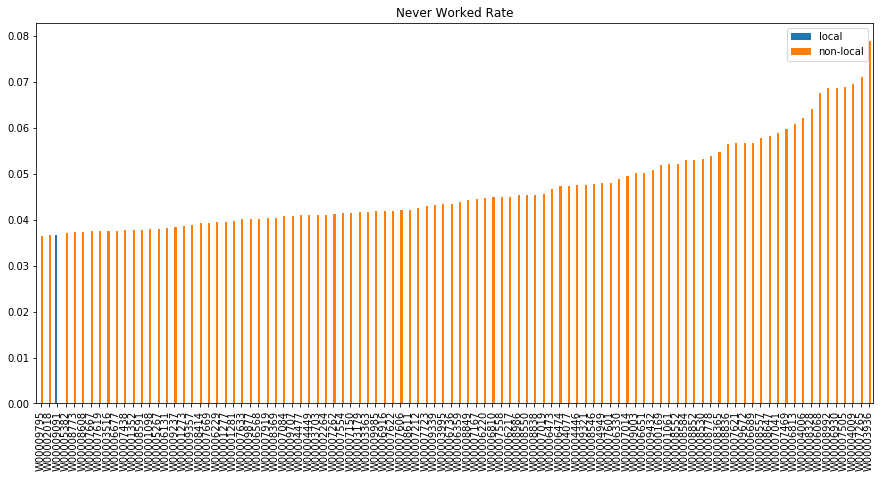

In [25]:
order = never_worked_rate_lnl['non-local'].dropna().sort_values().keys()
never_worked_rate_lnl['non-local'][oa_codes_list]=np.nan
never_worked_rate_lnl.set_index(never_worked_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Never Worked Rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]


In [26]:
disabled_rate_lnl = pd.concat([local_data['Economically inactive Long-term sick or disabled']/local_data['All usual residents aged 16 to 74'],\
                            data['Economically inactive Long-term sick or disabled']/data['All usual residents aged 16 to 74']],\
                           axis=1,keys=['local','non-local'])

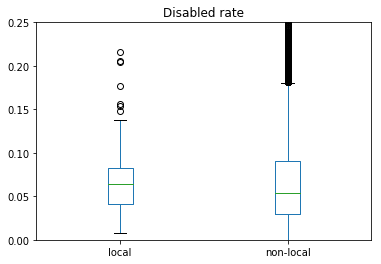

In [27]:
disabled_rate_lnl.plot(kind='box',title='Disabled rate',ylim=(0,0.25))

['W00008884']

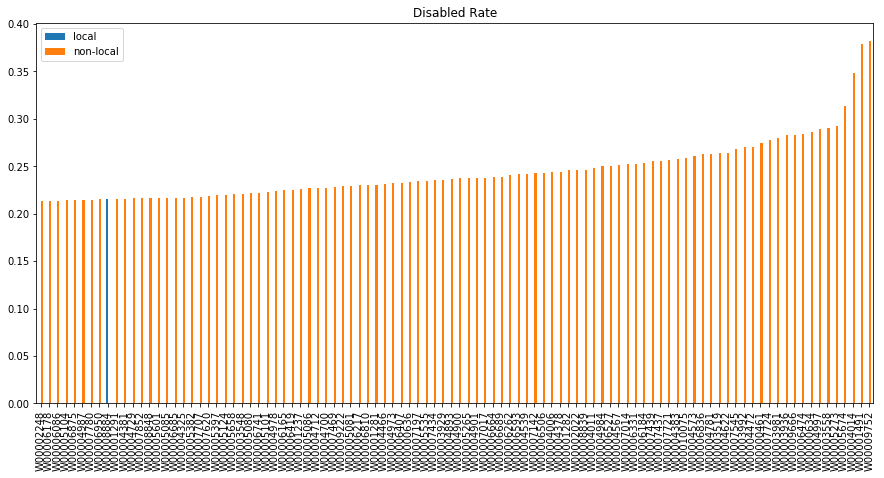

In [28]:
order = disabled_rate_lnl['non-local'].dropna().sort_values().keys()
disabled_rate_lnl['non-local'][oa_codes_list]=np.nan
disabled_rate_lnl.set_index(disabled_rate_lnl.index.values).loc[order[-100:]].plot(kind='bar',title='Disabled Rate',figsize=(15,7))
[code for code in order[-100:] if code in oa_codes_list]

In [36]:
[key for key in oa_codes_dict.keys() if np.isin(['W00009105', 'W00009570', 'W00009574', 'W00009101'], oa_codes_dict[key]).any()]

['W01001768', 'W01001855', 'W01001856']

Apart from that the SRCDC area has 4 OAs in the top 1 percentile for Wales for Caring for a family member, this information does not seem very informative. It would probably be more useful to look at LSOA level rather than OA level. I work on this is a separate notebook. 

Also note that the OA code W00009091 has appeared several times. This corresponds to an area in the middle of Grangetown that is known to be deprived. 